<a href="https://colab.research.google.com/github/javicevallos/Backend/blob/master/Proyecto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

________________________
# Proyecto 4  
Integrantes:

- Osvaldo Cubillos  
     osvaldo.cubillos@gmail.com

- Javier Ceballos  
    javicevallos@gmail.com

Enlace del video:
https://youtu.be/9_YqVIKoOKk
________________________


## RETO:
Se tiene un conjunto de datos simulado basado en seis meses de la información recogida por una aseguradora mundial llamada “SALUD Y SEGUROS”, cuyo objetivo fue desarrollar un modelo para determinar la probabilidad de siniestro en los próximos 12
meses.  
La variable de interés es la siniestralidad , que representa el estado binario de No Siniestro 0 y Siniestro 1.
### DESCRIPCIÓN DEL PROBLEMA
Los modelos analíticos para el manejo de los seguros de accidentes se están usando por muchas instituciones y están dando resultados exitosos en todo el mundo. Los modelos analíticos se pueden definir como un conjunto de métodos y técnicas cuantitativas usados para predecir la probabilidad de que un cliente falle (Sea siniestroso) y en consecuencia no se
recupere el rédito otorgado por la empresa.
### DESCRIPCIÓN DE LAS VARIABLES
![image.png](attachment:image.png)

### ENTREGABLE:
- Desarrollar el modelo basado en la metodología CRISP-DM.  
    - Realizar el análisis exploratorio de datos (EDA) con la variable dependiente (Target) e interpretar los hallazgos.
    - Identificar las variables más importantes
    - Realizar la segmentación de clientes.
    - Incluir la variable segmento como una variable cualitativa en el modelo final.
- Enviar la solución en Python Notebook (documentado).
- Realizar una presentación en PPT y enviar el link en youtube de la sustentación de la solución.
- Grupo: máximo 4 integrantes.
- Data: Siniestros.csv

# Solución del proyecto

In [ ]:
# Carga de la data
import pandas as pd 
import numpy as np
# Importando archivos
df = open('Siniestros.csv')
df = pd.read_csv(df, delimiter = ",")

df.head()

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,460,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,549,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no


## EDA - Análisis exploratorio de los Datos
Como se puede ver a continuación, la data está representada por variables cuantitativas y cualitativas. Según estos datos, se recalificará la variable cualitativa a cuantitativa recodificando los "si" y los "no" a un código Binario.  
- si = 1  
- no = 0  

Lo anterior se debe a que la variable de interés `Estado_Siniestro` requiere una preocupación para los *si*

In [ ]:
# Características de la data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           5800 non-null   int64  
 1   Antigüedad_Maxima    5213 non-null   float64
 2   Nivel_Ingresos       5527 non-null   float64
 3   Saldo_Pendiente      5800 non-null   float64
 4   Puntaje_Morosidad1   5800 non-null   int64  
 5   Puntaje_Morosidad2   5614 non-null   float64
 6   Puntaje_Morosidad3   5544 non-null   float64
 7   Puntaje_Morosidad4   5460 non-null   float64
 8   Puntaje_Morosidad5   5397 non-null   float64
 9   Puntaje_Morosidad6   5324 non-null   float64
 10  Saldo_Pendiente_Seg  5800 non-null   float64
 11  Siniestros1          5800 non-null   int64  
 12  Siniestros2          5800 non-null   int64  
 13  Siniestros3          5800 non-null   int64  
 14  Siniestros4          5800 non-null   int64  
 15  Siniestros5          5800 non-null   i

A continuación se procede a ver los datos duplicados y los datos faltantes.

### Datos duplicados - Datos Faltantes

In [ ]:
# Verificamos los duplicados
df[df["Cliente_ID"].duplicated()].head()
#No se aprecian datos repetidos para el campo "Cliente_ID"

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro


In [ ]:
# Datos faltantes
df.isnull().sum()

Cliente_ID                0
Antigüedad_Maxima       587
Nivel_Ingresos          273
Saldo_Pendiente           0
Puntaje_Morosidad1        0
Puntaje_Morosidad2      186
Puntaje_Morosidad3      256
Puntaje_Morosidad4      340
Puntaje_Morosidad5      403
Puntaje_Morosidad6      476
Saldo_Pendiente_Seg       0
Siniestros1               0
Siniestros2               0
Siniestros3               0
Siniestros4               0
Siniestros5               0
Siniestros6               0
Estado_Siniestro       1068
dtype: int64

Debido a que la variable de estudio `Estado_Siniestro` es la de estudio, y su cantidad representa al 18,4% de los datos, entonces se eliminarán todos aquellos datos faltantes en esta variable y se procederá a realizar las imputaciones en las demás variables. Otra solución hubiese sido analizar los datos y generar una regresión lineal con aquellas variables relevantes para el caso y con esos predecir la variable target, pero desconozco cómo funciona una regresión lineal en Python así que tomamos la decisión de eliminar aquellos valores nulos para nuestra variable `Estado_Siniestro`

In [ ]:
df["Estado_Siniestro"].isnull().sum()/len(df)*100

18.413793103448274

In [ ]:
#Copia del DataFrame df
df1 = df.copy()

In [ ]:
#Transformando la variable cualitativa a cuantitativa
df1["Estado_Siniestro"]=df1["Estado_Siniestro"].replace(["no","si"],[0,1])
df1

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0
3,460,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0
4,549,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,789697,13.0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,NaN
5796,789964,2.0,0.0,2196.94,0,0.0,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,0,NaN
5797,790092,4.0,2.0,805.72,0,0.0,0.0,0.0,NaN,NaN,0.0,0,0,0,0,0,0,NaN
5798,790346,0.0,NaN,0.01,0,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,0,NaN


In [ ]:
#Visualizando los cambios asociados a la variable modificada
df1["Estado_Siniestro"].unique()

array([ 0.,  1., nan])

In [ ]:
df1.dropna(subset=["Estado_Siniestro"],axis = 0, inplace = True)
df1.isnull().sum()

Cliente_ID               0
Antigüedad_Maxima      482
Nivel_Ingresos         231
Saldo_Pendiente          0
Puntaje_Morosidad1       0
Puntaje_Morosidad2       0
Puntaje_Morosidad3       1
Puntaje_Morosidad4       3
Puntaje_Morosidad5       4
Puntaje_Morosidad6       4
Saldo_Pendiente_Seg      0
Siniestros1              0
Siniestros2              0
Siniestros3              0
Siniestros4              0
Siniestros5              0
Siniestros6              0
Estado_Siniestro         0
dtype: int64

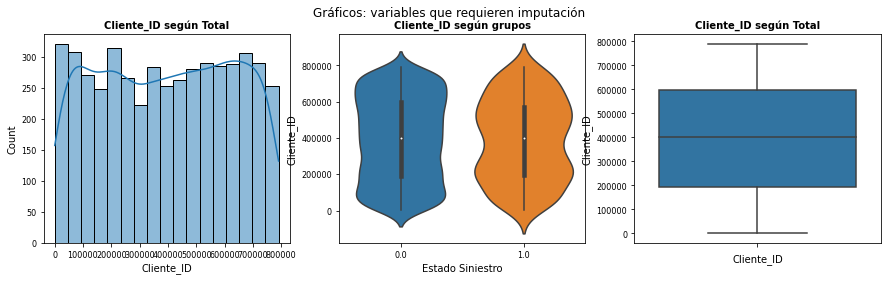

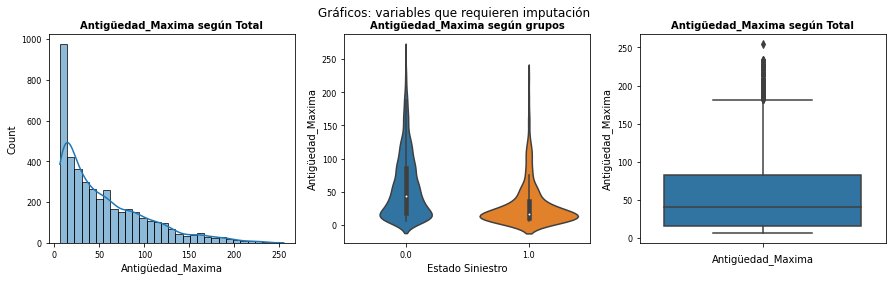

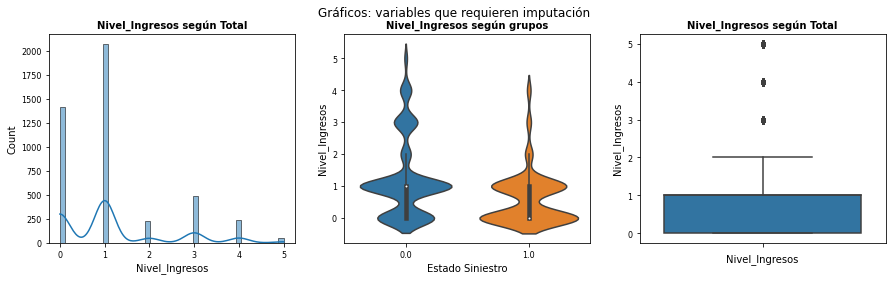

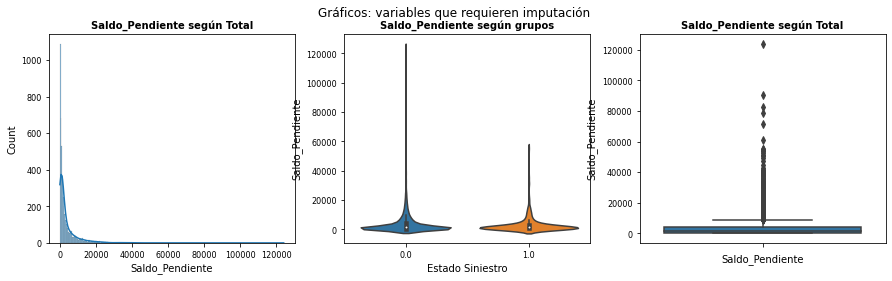

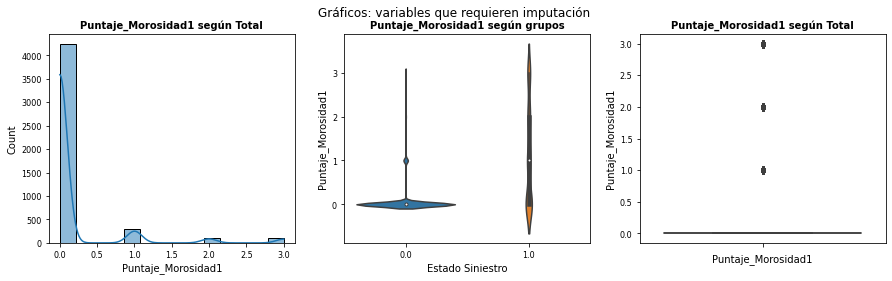

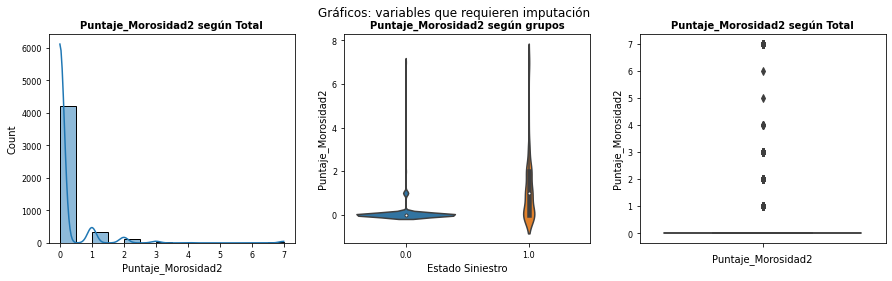

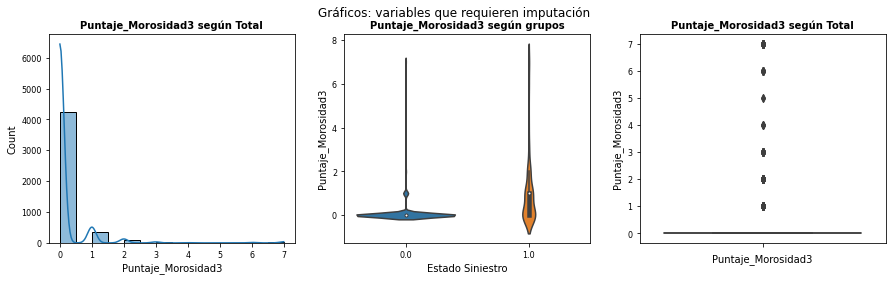

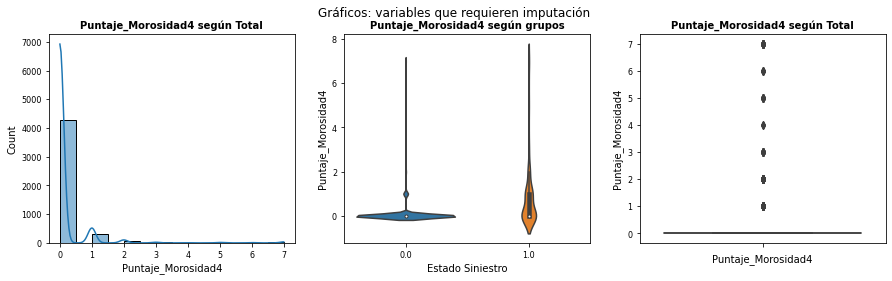

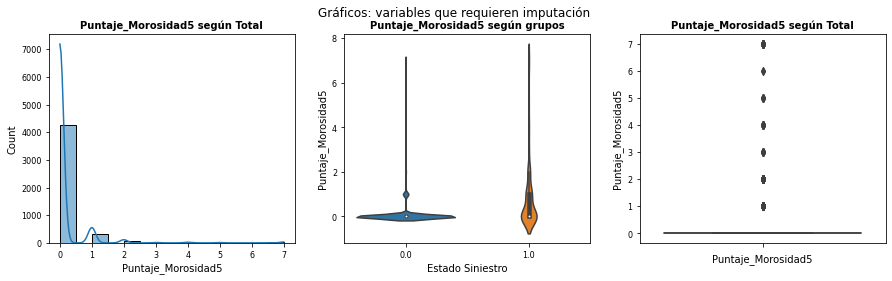

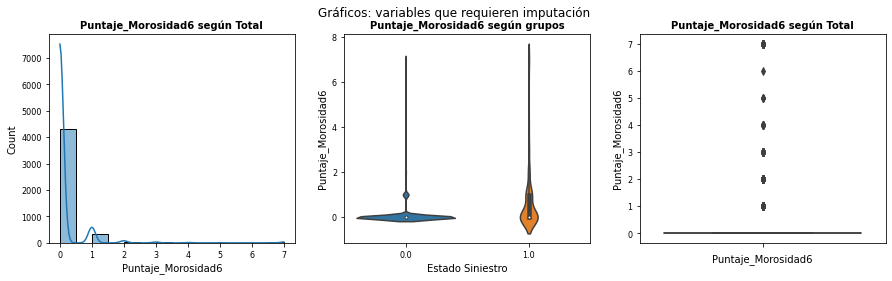

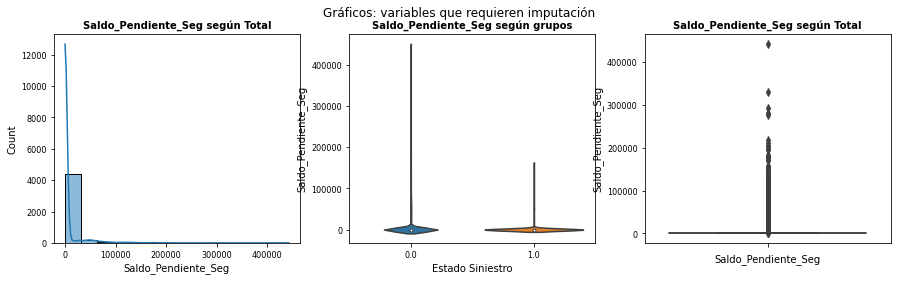

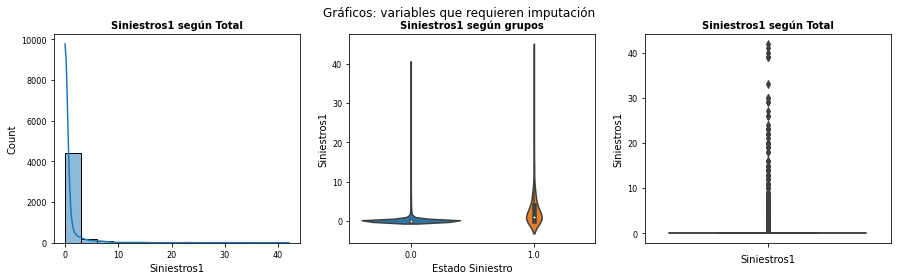

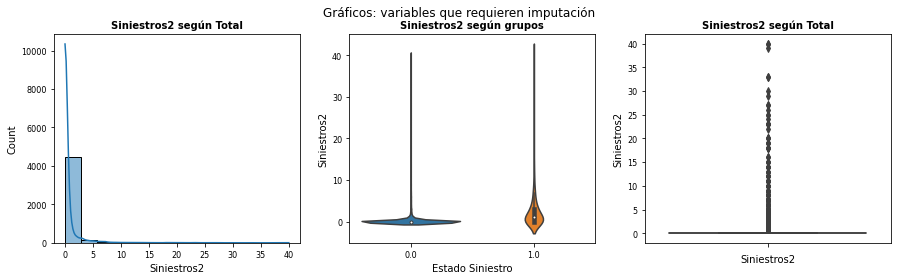

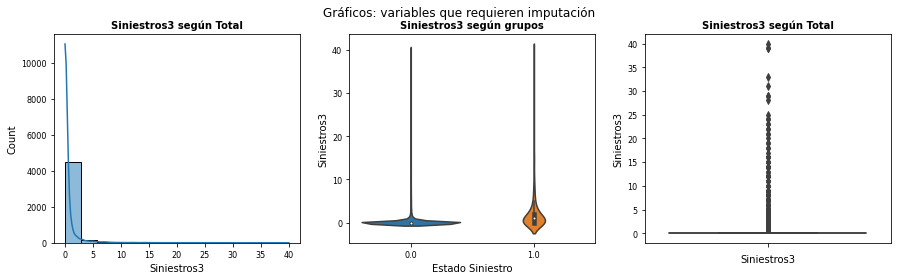

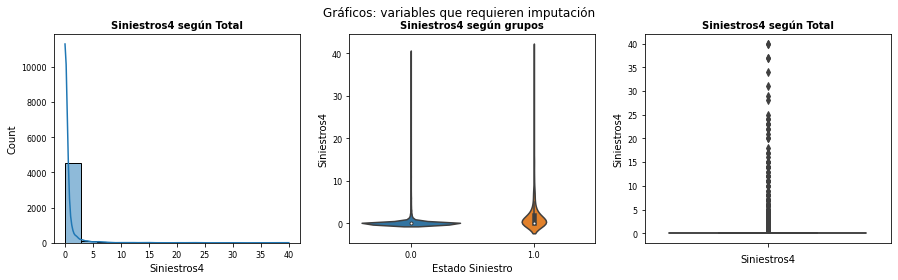

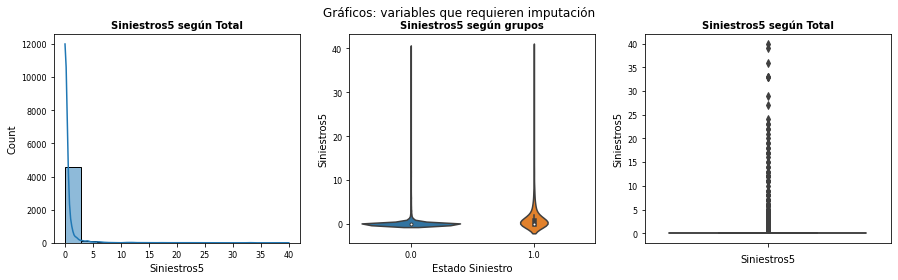

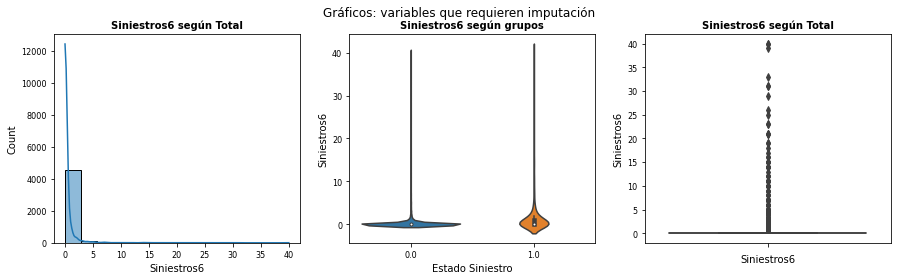

In [ ]:
#Graficando las variables
import seaborn as sns
import matplotlib.pyplot as plt
columna = df1.columns[:-1] #Gráfico de las variables excepto "Estado_Siniestro"
for i, colum in enumerate(columna): 
    fig, ax = plt.subplots(1, 3, figsize=(15, 3.84))
    fig.suptitle('Gráficos: variables que requieren imputación')
    sns.histplot(x=colum, data=df1, kde= True, ax=ax[0])
    ax[0].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel(colum)
    
    sns.violinplot(x = 'Estado_Siniestro', y = colum,  data  = df1, ax=ax[1])
    ax[1].set_title(str(colum) + " según grupos", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel('Estado Siniestro')
    
    sns.boxplot(y = colum,  data  = df1, ax=ax[2])
    ax[2].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[2].tick_params(labelsize = 8)
    ax[2].set_xlabel(colum)

### Imputación de los datos

In [ ]:
#Imputación por la mediana
df1.fillna(df1.median(), inplace = True)
df1

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0
3,460,41.0,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0
4,549,109.0,1.0,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,789119,7.0,3.0,12002.39,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0
4728,789320,41.0,1.0,739.67,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0
4729,789789,21.0,0.0,300.85,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,1.0
4730,790095,25.0,1.0,3218.91,3,7.0,7.0,7.0,7.0,7.0,0.0,4,3,3,4,2,2,1.0


In [ ]:
#Verificación de las imputaciones
df1.isnull().sum()

Cliente_ID             0
Antigüedad_Maxima      0
Nivel_Ingresos         0
Saldo_Pendiente        0
Puntaje_Morosidad1     0
Puntaje_Morosidad2     0
Puntaje_Morosidad3     0
Puntaje_Morosidad4     0
Puntaje_Morosidad5     0
Puntaje_Morosidad6     0
Saldo_Pendiente_Seg    0
Siniestros1            0
Siniestros2            0
Siniestros3            0
Siniestros4            0
Siniestros5            0
Siniestros6            0
Estado_Siniestro       0
dtype: int64

### Métricas para Estadística Descritiva

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Cliente_ID,4732.0,393450.745351,231501.022976,185.00,192643.7500,399771.50,596389.2500,790771.00
Antigüedad_Maxima,4250.0,54.984235,47.438491,6.00,16.0000,41.00,82.0000,255.00
Nivel_Ingresos,4501.0,1.161075,1.200946,0.00,0.0000,1.00,1.0000,5.00
Saldo_Pendiente,4732.0,3660.035167,6559.255155,0.01,465.0925,1299.42,3910.1075,124102.08
Puntaje_Morosidad1,4732.0,0.165258,0.548777,0.00,0.0000,0.00,0.0000,3.00
Puntaje_Morosidad2,4732.0,0.194421,0.746886,0.00,0.0000,0.00,0.0000,7.00
Puntaje_Morosidad3,4731.0,0.175439,0.714747,0.00,0.0000,0.00,0.0000,7.00
Puntaje_Morosidad4,4729.0,0.155847,0.671536,0.00,0.0000,0.00,0.0000,7.00
Puntaje_Morosidad5,4728.0,0.154188,0.645008,0.00,0.0000,0.00,0.0000,7.00
Puntaje_Morosidad6,4728.0,0.143190,0.618121,0.00,0.0000,0.00,0.0000,7.00


<Figure size 432x288 with 0 Axes>

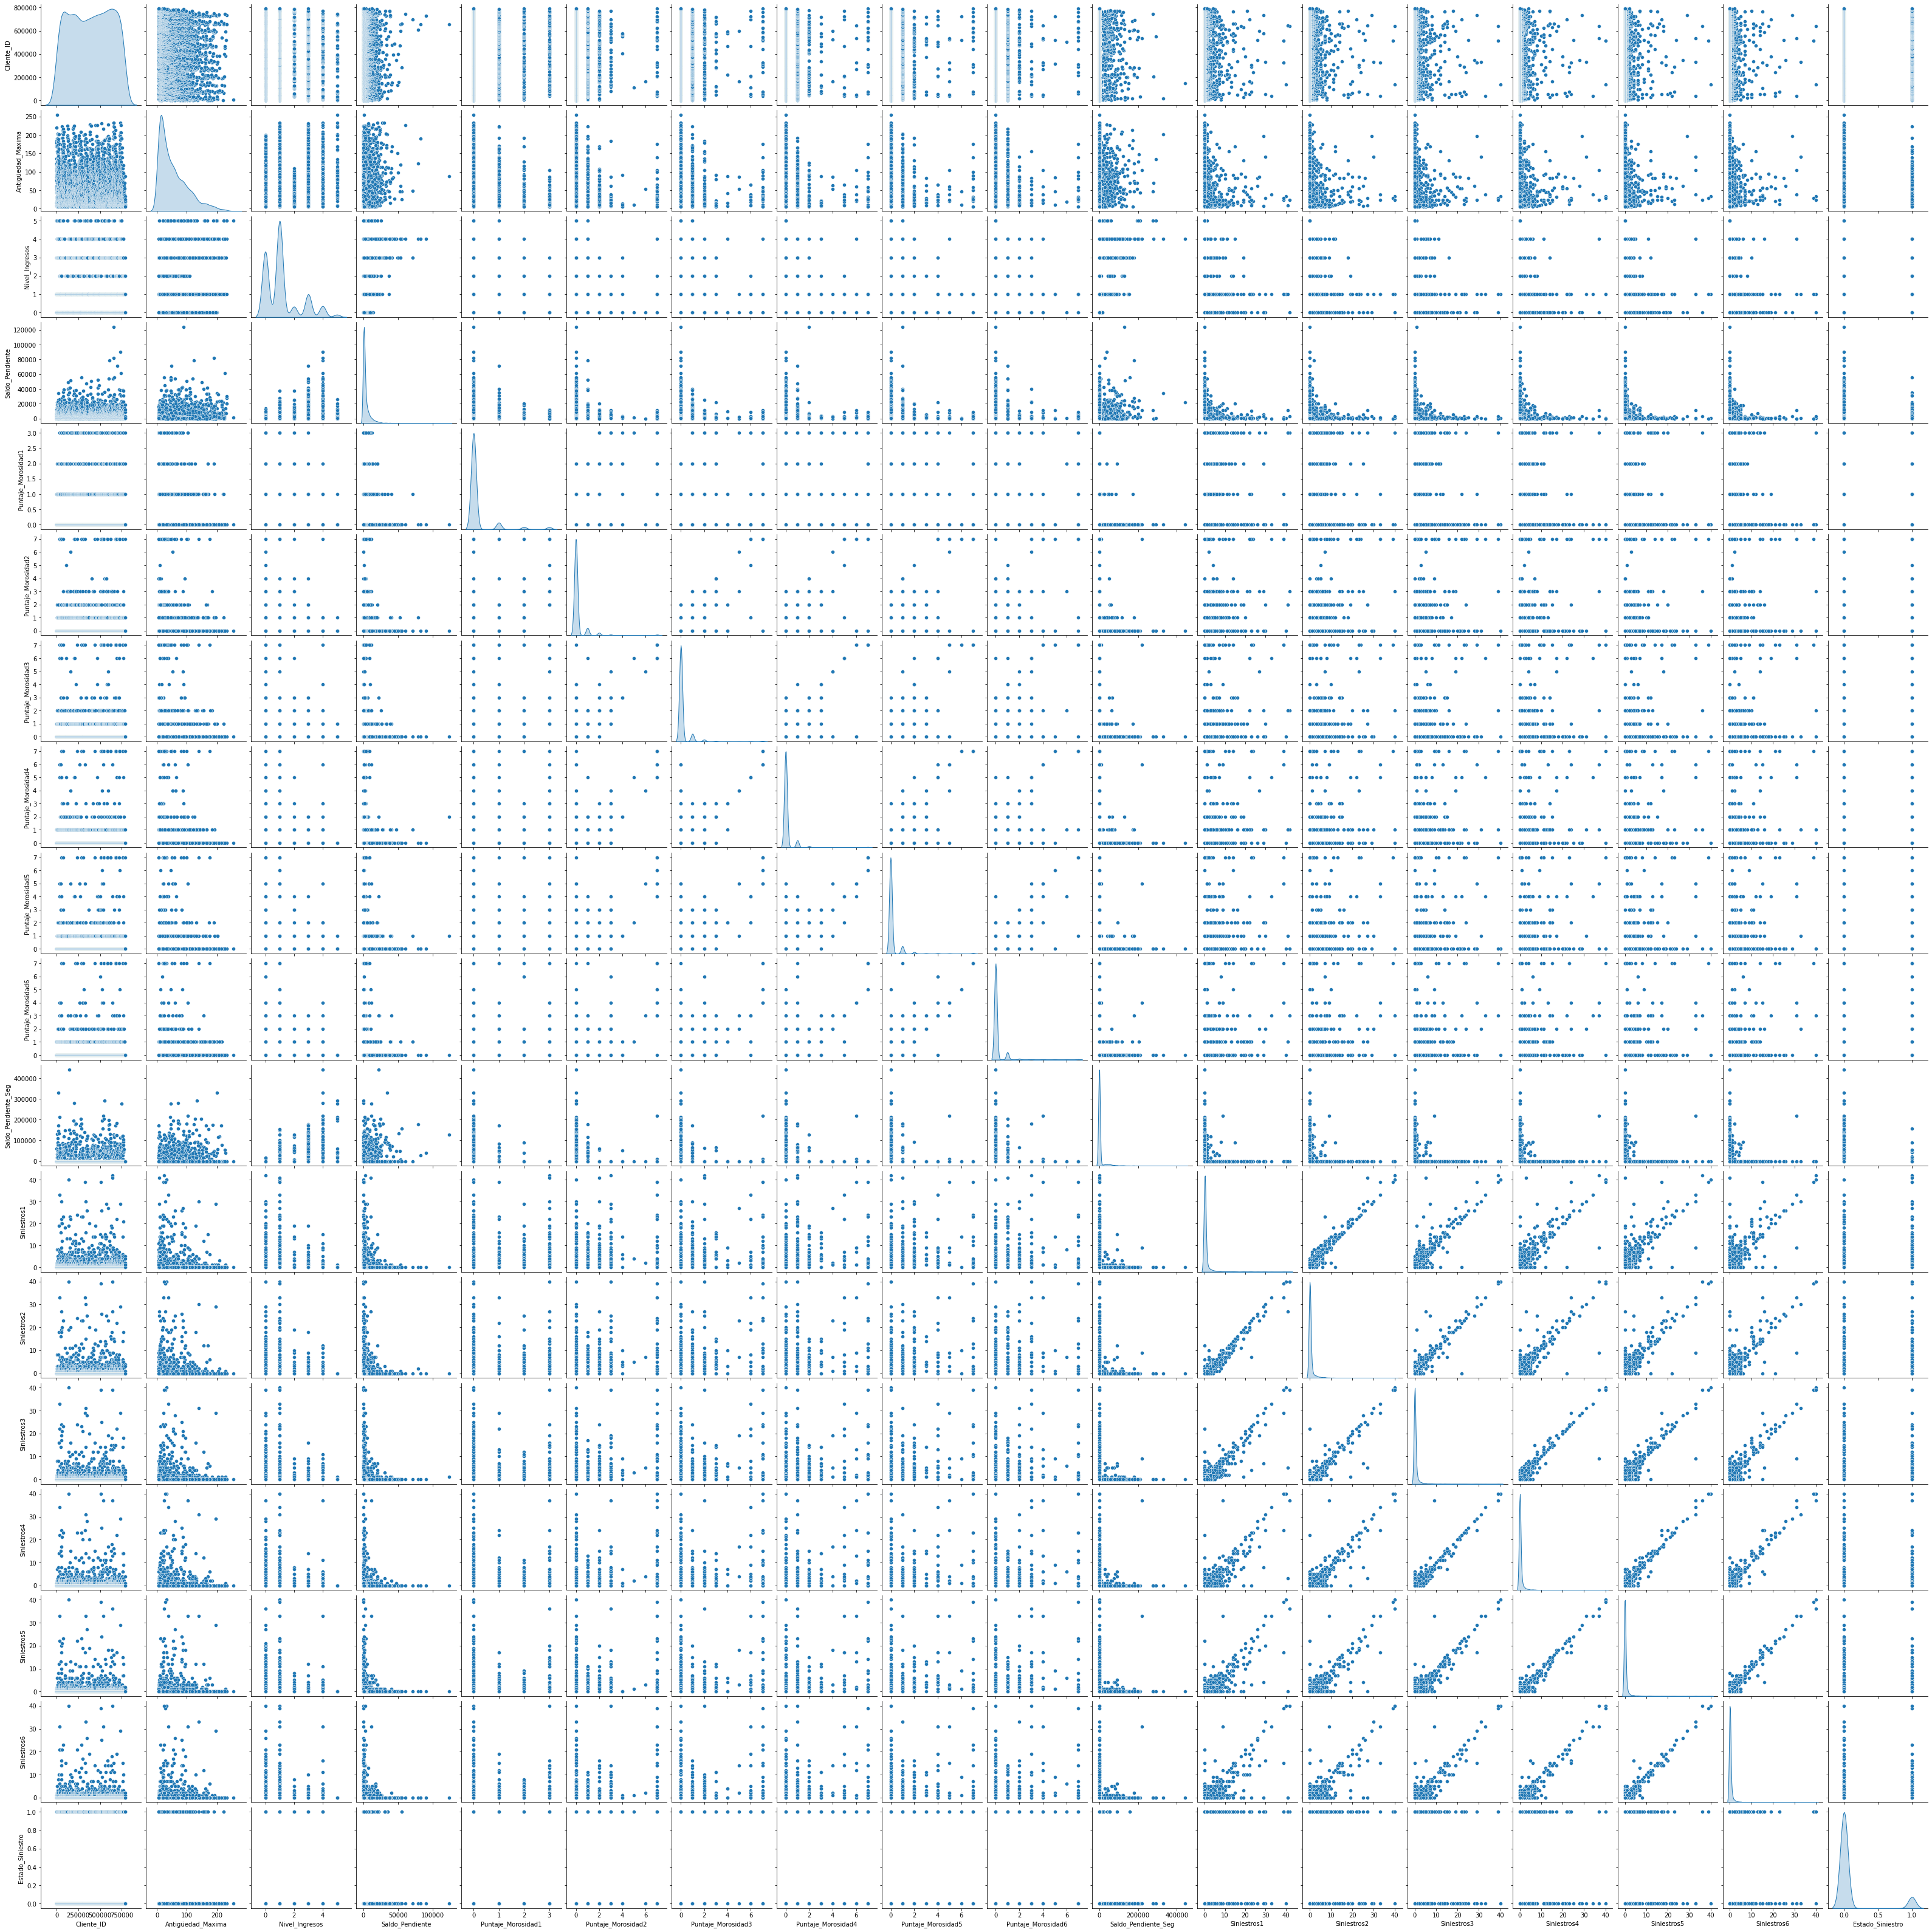

In [ ]:
plt.figure(figsize=(6,4))
sns.pairplot(df1, diag_kind='kde');

Si bien la gráfica no representa mayor ayuda respecto a las distribuciones de las variables, es posible ver que al costado derecho inferior existiría una asociación lineal entre las variables. Por ello es que se requiere realizar un mapa de correlaciones entre variables, la cual se presenta a continuación.

Text(0.5, 1.0, 'Gráfico Nº XX: Gráfico de la correlación de las variables numéricas')

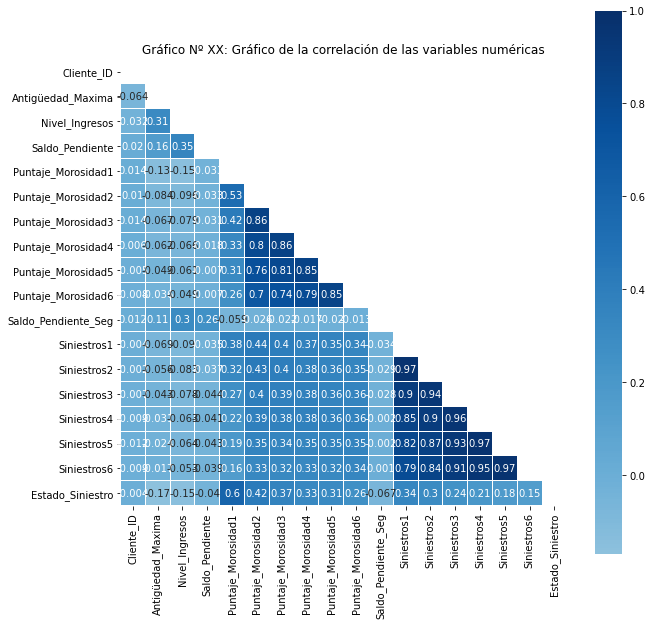

In [ ]:
correlacion = df1.corr(method='pearson').round(3)
mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
g = sns.heatmap(correlacion, mask = mask, cmap='Blues', vmax=1, center = 0,
square = True, linewidths=.1, annot=True)
g.set_title("Gráfico Nº XX: Gráfico de la correlación de las variables numéricas")

Es posible desprender que existe una correlación entre las variables de `Morosidad` y de `Sinistros`

In [ ]:
### Coeficientes de variación

In [ ]:
def coeficiente_variacion(x):
    import numpy as np
    import statistics as stats
    m = stats.mean(x)
    sd = np.std(x)
    return sd/m*100

In [ ]:
var_numerica = df1.columns
var_numerica = var_numerica[:-1]
df1[var_numerica].apply(coeficiente_variacion, axis=0).round(2)

Cliente_ID              58.83
Antigüedad_Maxima       84.30
Nivel_Ingresos         101.60
Saldo_Pendiente        179.19
Puntaje_Morosidad1     332.04
Puntaje_Morosidad2     384.12
Puntaje_Morosidad3     407.41
Puntaje_Morosidad4     430.99
Puntaje_Morosidad5     418.47
Puntaje_Morosidad6     431.83
Saldo_Pendiente_Seg    419.70
Siniestros1            420.69
Siniestros2            440.76
Siniestros3            461.09
Siniestros4            487.70
Siniestros5            508.88
Siniestros6            539.36
dtype: float64

In [ ]:
var_numerica = df1.columns
var_numerica = var_numerica[:-1]
var_numerica

Index(['Cliente_ID', 'Antigüedad_Maxima', 'Nivel_Ingresos', 'Saldo_Pendiente',
       'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3',
       'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6',
       'Saldo_Pendiente_Seg', 'Siniestros1', 'Siniestros2', 'Siniestros3',
       'Siniestros4', 'Siniestros5', 'Siniestros6'],
      dtype='object')

### Conclusiones respecto a la distribución de los datos  

Los datos presenten en la Base de datos presentan un casi 20% de datos faltantes, para evitar problemas o malas interpretaciones, el equipo de analistas decidió eliminar esos registros correspondientes a la variable Tarjet a fin de evitar distorsiones en la información. Luego de esto se procedió a imputar los datos por la mediana.  
Finalmente, ante los distintas salidas de funciones de **'Python'**, se pudo desprender que la información presenta mucha distorición en sus variables. Los valores `outliders` son bastantes y se pueden visualizar en los diagramas de caja y bigote y violín.  
Las variables en cuestión presentan algunas correlaciones que se pueden ver en los gráficos de correlaciones como de calor.
Con los datos ya listos, se procederá a identificar las variables más significativas.

## Análisis de Componentes Principales (PCA)


In [ ]:
#Recodificando la variable objetivo
df2 = df1.copy()
#Transformando la variable cualitativa a cuantitativa
df2["Estado_Siniestro"]=df2["Estado_Siniestro"].replace([0,1],["no","si"])
df2

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,460,41.0,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,549,109.0,1.0,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,789119,7.0,3.0,12002.39,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4728,789320,41.0,1.0,739.67,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4729,789789,21.0,0.0,300.85,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,si
4730,790095,25.0,1.0,3218.91,3,7.0,7.0,7.0,7.0,7.0,0.0,4,3,3,4,2,2,si


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4732 entries, 0 to 4731
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           4732 non-null   int64  
 1   Antigüedad_Maxima    4732 non-null   float64
 2   Nivel_Ingresos       4732 non-null   float64
 3   Saldo_Pendiente      4732 non-null   float64
 4   Puntaje_Morosidad1   4732 non-null   int64  
 5   Puntaje_Morosidad2   4732 non-null   float64
 6   Puntaje_Morosidad3   4732 non-null   float64
 7   Puntaje_Morosidad4   4732 non-null   float64
 8   Puntaje_Morosidad5   4732 non-null   float64
 9   Puntaje_Morosidad6   4732 non-null   float64
 10  Saldo_Pendiente_Seg  4732 non-null   float64
 11  Siniestros1          4732 non-null   int64  
 12  Siniestros2          4732 non-null   int64  
 13  Siniestros3          4732 non-null   int64  
 14  Siniestros4          4732 non-null   int64  
 15  Siniestros5          4732 non-null   i

In [ ]:
#Data con variables numéricas
df3 = df2.iloc[:,1:17]

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4732 entries, 0 to 4731
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Antigüedad_Maxima    4732 non-null   float64
 1   Nivel_Ingresos       4732 non-null   float64
 2   Saldo_Pendiente      4732 non-null   float64
 3   Puntaje_Morosidad1   4732 non-null   int64  
 4   Puntaje_Morosidad2   4732 non-null   float64
 5   Puntaje_Morosidad3   4732 non-null   float64
 6   Puntaje_Morosidad4   4732 non-null   float64
 7   Puntaje_Morosidad5   4732 non-null   float64
 8   Puntaje_Morosidad6   4732 non-null   float64
 9   Saldo_Pendiente_Seg  4732 non-null   float64
 10  Siniestros1          4732 non-null   int64  
 11  Siniestros2          4732 non-null   int64  
 12  Siniestros3          4732 non-null   int64  
 13  Siniestros4          4732 non-null   int64  
 14  Siniestros5          4732 non-null   int64  
 15  Siniestros6          4732 non-null   i

In [ ]:
columns = df3.select_dtypes(exclude=['object']).columns # columnas numérica solamente
columns

Index(['Antigüedad_Maxima', 'Nivel_Ingresos', 'Saldo_Pendiente',
       'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3',
       'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6',
       'Saldo_Pendiente_Seg', 'Siniestros1', 'Siniestros2', 'Siniestros3',
       'Siniestros4', 'Siniestros5', 'Siniestros6'],
      dtype='object')

In [ ]:
#Importando librería
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
from sklearn.datasets import make_blobs
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df3)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.components_ # matriz i * j

array([[-3.20654641e-02, -4.52549500e-02, -2.16261478e-02,
         1.62421430e-01,  2.69829317e-01,  2.68489002e-01,
         2.64465728e-01,  2.58413280e-01,  2.49876183e-01,
        -1.44324607e-02,  3.20435494e-01,  3.28109952e-01,
         3.30647941e-01,  3.28284168e-01,  3.19997907e-01,
         3.09811184e-01],
       [ 4.29335481e-02,  3.18879668e-02,  9.04810674e-04,
        -1.53381426e-01, -3.31777547e-01, -3.55915886e-01,
        -3.55576332e-01, -3.56961714e-01, -3.29010232e-01,
         1.93693671e-02,  2.09911101e-01,  2.30653559e-01,
         2.51015348e-01,  2.56467468e-01,  2.68979102e-01,
         2.75651724e-01],
       [ 4.09333213e-01,  5.77471378e-01,  5.03387809e-01,
        -1.35610452e-01,  4.73768166e-03,  3.23739806e-02,
         5.63623698e-02,  6.68655144e-02,  7.71509270e-02,
         4.57741666e-01, -2.30222619e-02, -8.78976055e-03,
         2.82331457e-03,  2.50110976e-02,  2.61674019e-02,
         3.25602779e-02],
       [-5.04723424e-01, -2.85612934e

In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
componentes = pd.DataFrame(
data = modelo_pca.components_,
columns = df3.columns,
index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 
         'PC9','PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15','PC16'])
componentes = componentes.transpose().round(3)
componentes

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
Antigüedad_Maxima,-0.032,0.043,0.409,-0.505,-0.592,0.305,0.362,0.011,-0.019,0.010,0.002,-0.007,0.001,0.001,-0.002,0.000
Nivel_Ingresos,-0.045,0.032,0.577,-0.029,-0.089,-0.046,-0.807,-0.034,0.010,0.006,-0.004,0.000,-0.000,0.000,0.001,-0.005
Saldo_Pendiente,-0.022,0.001,0.503,0.342,-0.056,-0.685,0.394,0.025,0.037,-0.010,0.006,0.005,-0.002,0.002,-0.000,-0.000
Puntaje_Morosidad1,0.162,-0.153,-0.136,0.598,-0.570,0.194,-0.062,-0.399,0.112,0.173,0.064,0.031,-0.011,-0.004,0.032,0.002
Puntaje_Morosidad2,0.270,-0.332,0.005,0.109,-0.121,0.069,-0.034,0.349,0.240,-0.573,-0.304,-0.424,-0.066,-0.016,-0.012,-0.007
Puntaje_Morosidad3,0.268,-0.356,0.032,-0.013,-0.011,0.029,-0.021,0.380,0.190,-0.034,0.232,0.748,0.051,0.014,-0.002,0.010
Puntaje_Morosidad4,0.264,-0.356,0.056,-0.113,0.099,-0.029,0.001,0.194,0.077,0.574,0.398,-0.486,0.084,-0.006,0.007,-0.047
Puntaje_Morosidad5,0.258,-0.357,0.067,-0.152,0.126,-0.059,0.028,-0.231,-0.178,0.335,-0.733,0.143,-0.018,-0.042,-0.012,0.037
Puntaje_Morosidad6,0.250,-0.329,0.077,-0.193,0.161,-0.068,0.036,-0.568,-0.309,-0.434,0.381,-0.016,-0.038,0.034,0.009,0.001
Saldo_Pendiente_Seg,-0.014,0.019,0.458,0.379,0.456,0.619,0.230,0.003,-0.043,0.007,-0.001,0.001,-0.007,-0.010,-0.003,-0.004


### Influencia de las variables en cada componente

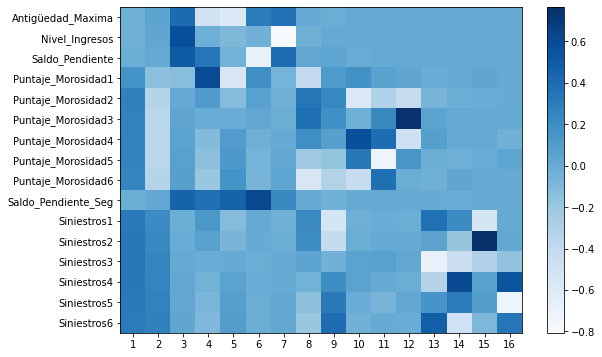

In [ ]:
# Heatmap de los 15 componentes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='Blues', aspect='auto') 
plt.yticks(range(len(df3.columns)), df3.columns)
plt.xticks(range(len(df3.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

### Varianza explicada en cada componente

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.44716345 0.17630015 0.11037075 0.0608443  0.05328943 0.04540499
 0.03685986 0.0191401  0.01679735 0.01050796 0.00812345 0.00698472
 0.00357584 0.00214287 0.0013756  0.00111918]


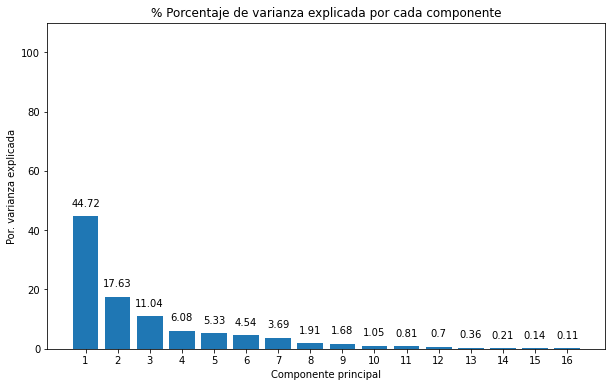

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.bar(
    x = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_*100
)

for x, y in zip(np.arange(len(df3.columns)) + 1, modelo_pca.explained_variance_ratio_*100):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1*100)
ax.set_title('% Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

De acuerdo al gráfico anterior, las primeras 5 componentes principales son las que se deberían utilizar en el modelo debido a que éstas tienen un porcentaje superior al **5%**

### Varianza explicada acumulada

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.44716345 0.6234636  0.73383435 0.79467865 0.84796808 0.89337307
 0.93023293 0.94937303 0.96617038 0.97667833 0.98480178 0.99178651
 0.99536235 0.99750522 0.99888082 1.        ]


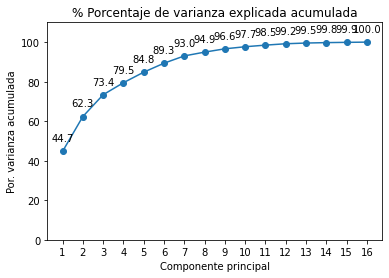

In [ ]:
# Porcentaje de varianza explicada acumulada

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df3.columns)) + 1,
    prop_varianza_acum*100,
    marker = 'o'
)

for x, y in zip(np.arange(len(df3.columns)) + 1, prop_varianza_acum*100):
    label = round(y, 1)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1*100)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('% Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Según este gráfico acumulado, las primeras 5 variables representarían al casi **84,8%** de las variables totales en el modelo y serían principalmente esas las que se deberían utilizar.

## Segmentación de clientes

In [ ]:
# Tratamiento de datos

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_blobs

# Gráficos

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

In [ ]:
#Visualización del DataFrame compuesto por variables cuantitativas
df3.sample(4)

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
623,76.0,1.0,741.62,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
26,15.0,1.0,276.72,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1550,41.0,1.0,1157.18,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1513,82.0,1.0,558.83,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0


### Estandarización de las variables

In [ ]:
# Estandarización de las variables
# ==============================================================================
datos_scaled = scale(X=df3, axis=0, with_mean=True, with_std=True) 

datos_scaled = pd.DataFrame(datos_scaled, 
                            columns=df3.columns, 
                            index=df3.index)
datos_scaled.head(4)

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6
0,-0.211730,-0.130766,-0.465830,-0.30117,-0.260336,-0.245454,-0.232022,-0.238966,-0.231574,-0.238267,-0.237704,-0.226882,-0.216876,-0.205044,-0.19651,-0.185404
1,0.563449,-0.130766,-0.404635,-0.30117,-0.260336,-0.245454,-0.232022,-0.238966,-0.231574,-0.238267,-0.237704,-0.226882,-0.216876,-0.205044,-0.19651,-0.185404
2,1.072852,-0.130766,-0.512430,-0.30117,-0.260336,-0.245454,-0.232022,-0.238966,-0.231574,-0.238267,-0.237704,-0.226882,-0.216876,-0.205044,-0.19651,-0.185404
3,-0.278174,-0.130766,-0.459681,-0.30117,-0.260336,-0.245454,-0.232022,-0.238966,-0.231574,-0.238267,-0.237704,-0.226882,-0.216876,-0.205044,-0.19651,-0.185404


### Cálculo de distancias euclidianas

In [ ]:
# Cálculo de distancias

print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.head(8)

------------------
Distancia euclídea
------------------


,0,1,2,3,4,5,6,7,8,9,...,4722,4723,4724,4725,4726,4727,4728,4729,4730,4731
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.777591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.285428,0.520684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.066728,0.843421,1.352056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.440826,0.675221,0.155530,1.507470,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.079903,2.308389,1.794527,3.146502,1.639256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.993745,2.262220,1.836515,3.055852,1.711259,1.036194,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.765021,1.621234,1.715007,1.792948,1.773042,2.868203,2.848149,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se reestructura la Matriz para ordenar de menor a mayor las distancias usando el compando `sort_values`

In [ ]:
# Top n registros más similares

distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(10)

,estado_a,estado_b,distancia
11625516,3724,2456,0.000005
4195008,2456,886,0.000012
4196276,3724,886,0.000017
5379035,3483,1136,0.000027
581144,3840,122,0.000034
1662068,1136,351,0.000055
4206318,4302,888,0.000061
810041,869,171,0.000064
508327,2003,107,0.000064
580411,3107,122,0.000076


### Número óptimo de Clusters

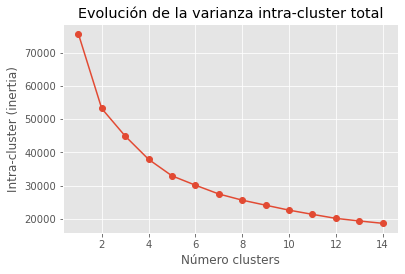

In [ ]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(datos_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

De acuerdo a la gráfica anterior, sería posible concluir que las tasas de decrecimientos visualizadas en el gráfico permiten determinar que la cantidad óptima de cluster pueden ser **5**

## Inclusión de la variable segmento $Cluster_i$ en el modelo final
### Entrenamiento de los datos (k=5)

In [ ]:
kmeans = KMeans(n_clusters=5).fit(datos_scaled)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.15184784 -0.36221877 -0.2177175  -0.19140458 -0.18045737 -0.17286338
  -0.1586092  -0.15895031 -0.14201343 -0.18589827 -0.16701497 -0.16419507
  -0.15577316 -0.1450163  -0.13486648 -0.1248684 ]
 [ 0.0177473  -0.41526513 -0.34982607  1.06565016  2.78968656  2.66992646
   2.95434055  2.73407366  2.69094378  0.02240597  8.05537401  8.49322934
   9.13071138  9.28993525  9.31021448  9.16926827]
 [-0.41246391 -0.50349583 -0.18503578  2.61125314  1.54481768  1.34877944
   1.08327559  1.05693214  0.89531683 -0.20083148  1.39311132  1.26456768
   1.04988605  0.87807097  0.78090841  0.65619633]
 [-0.11985726 -0.22559913 -0.19600265  0.8462839   8.41859067  9.13559208
   9.2580974   9.12539182  8.82073803 -0.22097014  1.04029107  1.13110596
   1.21682842  1.21260915  1.05712443  0.88523088]
 [ 0.74727955  1.62745701  0.94205759 -0.25163668 -0.21484256 -0.19157047
  -0.16791171 -0.14410557 -0.14175246  0.80825519 -0.20244909 -0.18815697
  -0.17303635 -0.16018345 -0.16137084 -0.14502785]]


In [ ]:
#Cantidad de cluster generados
kmeans.n_clusters


5

In [ ]:
# cluster al que pertenece cada persona
cluster = kmeans.predict(datos_scaled)
cluster

array([0, 0, 0, ..., 0, 3, 0])

### Incorporación de la variable cualitativa $Cluster_i$ en el Dataframe

In [ ]:
# El cluster en nuestro DataFrame

df3['cluster'] = cluster
df3['cluster'].replace({0: "Clúster 0",  # etiquetamos los grupos
                                   1: "Clúster 1",
                                   2: "Clúster 2",
                                   3: "Clúster 3",
                                   4: "Clúster 4"},
                                  inplace=True)
df3.head()

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,cluster
0,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,Clúster 0
1,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,Clúster 0
2,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,Clúster 0
3,41.0,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,Clúster 0
4,109.0,1.0,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,Clúster 0


In [ ]:
# Perfilando cada Estrato. Podemos añadir variables cualitativas para su mejor entendimiento.
#---------------------------------------------------------------------------------------------
df3.groupby(['cluster'])[columns].mean().round(2).T

cluster,Clúster 0,Clúster 1,Clúster 2,Clúster 3,Clúster 4
Antigüedad_Maxima,46.70,54.36,34.94,48.15,87.30
Nivel_Ingresos,0.73,0.67,0.56,0.89,3.06
Saldo_Pendiente,2232.12,1365.68,2446.47,2374.54,9838.58
Puntaje_Morosidad1,0.06,0.75,1.60,0.63,0.03
Puntaje_Morosidad2,0.06,2.28,1.35,6.48,0.03
Puntaje_Morosidad3,0.05,2.08,1.14,6.70,0.04
Puntaje_Morosidad4,0.05,2.14,0.88,6.37,0.04
Puntaje_Morosidad5,0.05,1.92,0.84,6.04,0.06
Puntaje_Morosidad6,0.06,1.81,0.70,5.59,0.06
Saldo_Pendiente_Seg,1219.59,6070.66,871.82,402.82,24371.82


In [ ]:
# Tabla de frecuencia del Cluster
cluster_count = (df3
                       .groupby("cluster")
                       .agg(frequency=("cluster", "count")))

cluster_count["Acumulado"] = cluster_count["frequency"].cumsum()
cluster_count

,frequency,Acumulado
cluster,,
Clúster 0,3470,3470
Clúster 1,36,3506
Clúster 2,316,3822
Clúster 3,27,3849
Clúster 4,883,4732


### Graficando  las variables numéricas

In [ ]:
import seaborn as sns

def graficar_nums(cluster, var_num, data):

  fig, ax = plt.subplots(figsize=(6, 3.84))

  sns.violinplot(
          x     = cluster,
          y     = var_num,
          data  = data,
          #color = "white",
          ax    = ax
      )

  ax.set_title(f'{var_num} por Cluster');

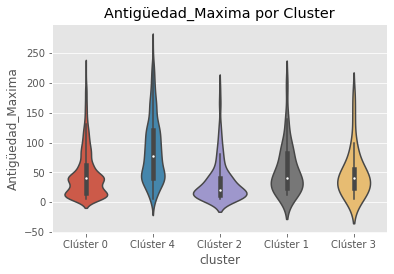

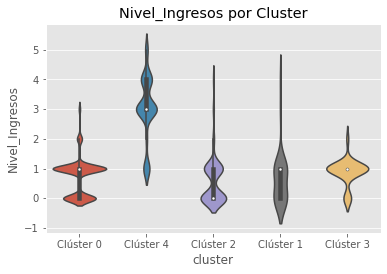

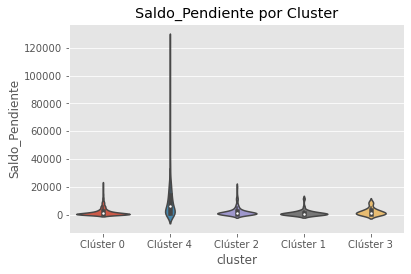

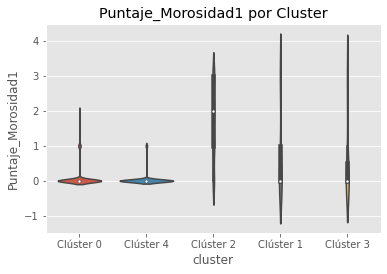

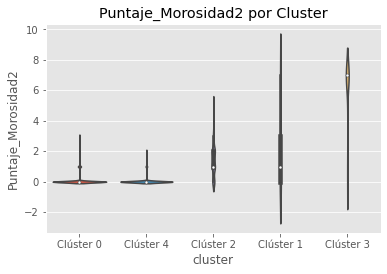

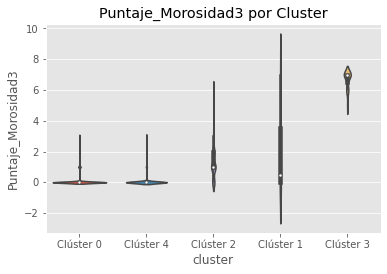

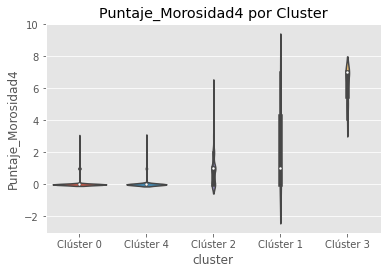

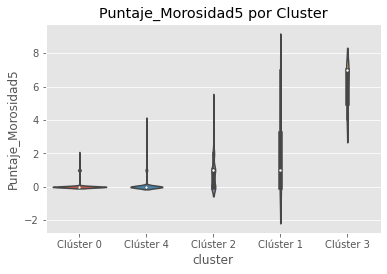

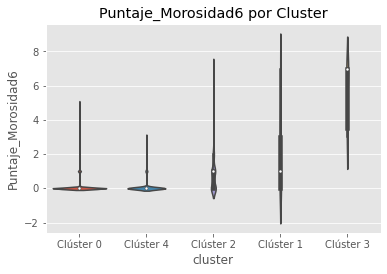

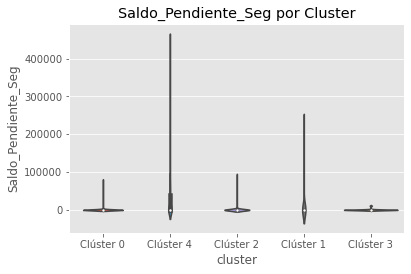

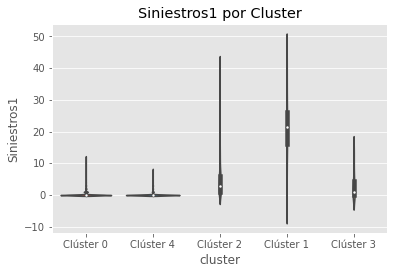

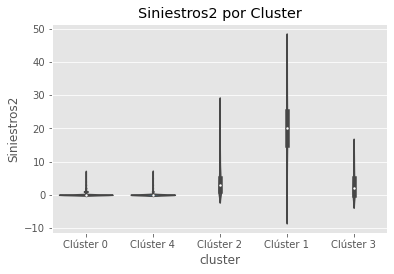

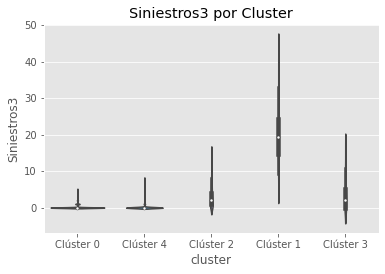

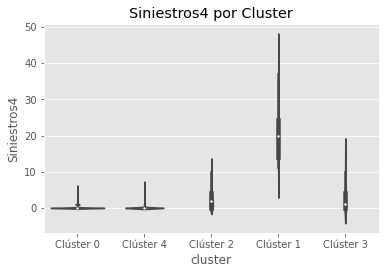

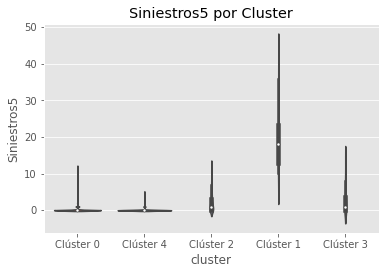

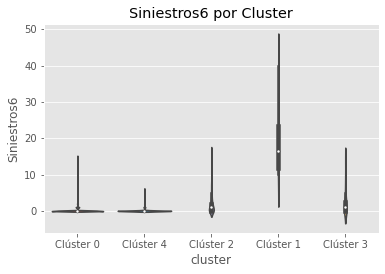

In [ ]:
cluster = 'cluster'

for i in columns: 
  graficar_nums(cluster, i, df3)